In [0]:

!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg

--2019-07-24 05:25:17--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 54.239.130.13, 2600:9000:2011:c00:0:5a51:64c9:c681, 2600:9000:2011:5400:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|54.239.130.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2019-07-24 05:25:17--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|54.239.130.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  60.48K  --.-KB/s    in 0.02s   

2019-07-24 05:25:18 (3.47 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61927]

--2019-07-24 05:25:20--  http://farm3.static.flickr.com/

In [0]:
!ls -al imagenet

total 552
drwxr-xr-x 2 root root  4096 Jul 24 02:37 .
drwxr-xr-x 1 root root  4096 Jul 24 02:37 ..
-rw-r--r-- 1 root root 41064 Mar 13 23:23 cat1.jpg
-rw-r--r-- 1 root root 53480 Mar 20 08:44 cat2.jpg
-rw-r--r-- 1 root root 68339 Mar 28 15:09 cat3.jpg
-rw-r--r-- 1 root root 68759 Mar 23 18:41 dog1.jpg
-rw-r--r-- 1 root root 72968 Mar 23 20:15 dog2.jpg
-rw-r--r-- 1 root root 70680 Mar 31 02:39 dog3.jpg
-rw-r--r-- 1 root root 61927 Mar 10 00:20 mushroom1.jpg
-rw-r--r-- 1 root root 72318 Mar 24 06:09 mushroom2.jpg
-rw-r--r-- 1 root root 25326 Feb 23 06:44 mushroom3.jpg


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np
import matplotlib.pyplot as plt

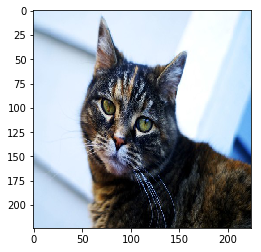

<class 'numpy.ndarray'>
(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 1000)
[281]
[[('n02123045', 'tabby', 0.56473064), ('n02123159', 'tiger_cat', 0.24337897), ('n02124075', 'Egyptian_cat', 0.17173713), ('n02127052', 'lynx', 0.009091862), ('n02971356', 'carton', 0.0010486502)]]
class = tabby
confidence = 0.56473064


In [0]:
filename = "imagenet/cat1.jpg"

image = load_img(filename, target_size=(224,224))
plt.imshow(image)
plt.show()

image = img_to_array(image)

print(type(image))
print(image.shape)
# print(image)

image = image.reshape((1,224,224,3))
print(image.shape)

image = vgg16.preprocess_input(image)
print(image.shape)


from keras.applications import vgg16

model = vgg16.VGG16()
# model.summary()

y_ = model.predict(image)

# print(y_)
print(y_.shape)

print(np.argmax(y_, axis=1))

label = vgg16.decode_predictions(y_)
print(label)

predicted = label[0][0]

print("class =",predicted[1])
print("confidence =",predicted[2])






# 최소 VGG16 예측 코드

imagenet/cat1.jpg


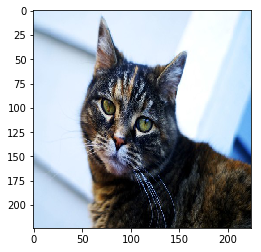

tabby 0.56473064
imagenet/cat2.jpg


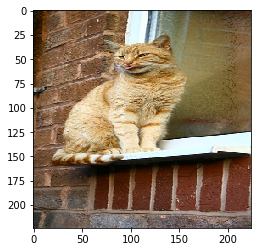

tiger_cat 0.39949998
imagenet/cat3.jpg


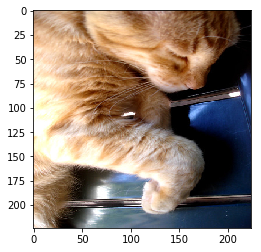

tiger_cat 0.18942524
imagenet/dog1.jpg


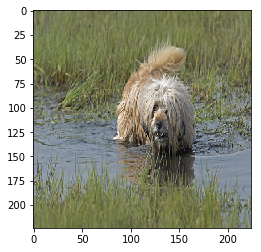

Tibetan_terrier 0.8124838
imagenet/dog2.jpg


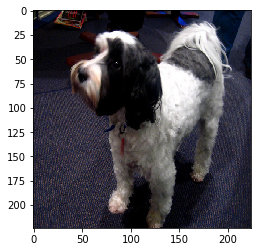

Tibetan_terrier 0.86200583
imagenet/dog3.jpg


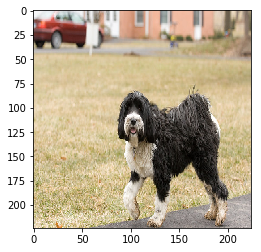

standard_poodle 0.2331605
imagenet/mushroom1.jpg


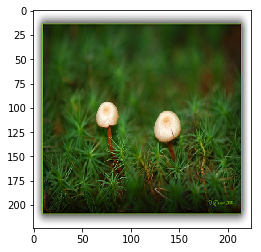

acorn 0.33854613
imagenet/mushroom2.jpg


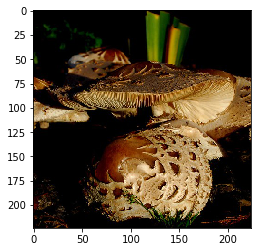

mushroom 0.71359855
imagenet/mushroom3.jpg


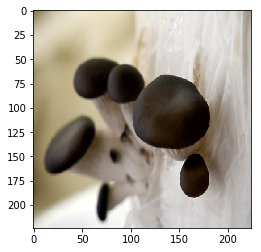

birdhouse 0.23660076


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

def predict_with_vgg16(model, file_name):

  print(file_name)
  image = load_img(file_name, target_size=(224,224))
  plt.imshow(image)
  plt.show()

  image = img_to_array(image).reshape((1,224,224,3))
  image = vgg16.preprocess_input(image)

  y_ = model.predict(image)
  label = vgg16.decode_predictions(y_)
  predicted = label[0][0]

  print(predicted[1], predicted[2])

  
model = vgg16.VGG16()

file_names = [
    "imagenet/cat1.jpg",
    "imagenet/cat2.jpg",
    "imagenet/cat3.jpg",
    "imagenet/dog1.jpg",
    "imagenet/dog2.jpg",
    "imagenet/dog3.jpg",
    "imagenet/mushroom1.jpg",
    "imagenet/mushroom2.jpg",
    "imagenet/mushroom3.jpg"    
]

for file_name in file_names:
  predict_with_vgg16(model, file_name)
  


# VGG16 배치 처리

(9, 224, 224, 3)
[['n02123045' 'tabby' '0.5647305']
 ['n02123159' 'tiger_cat' '0.3994993']
 ['n02123159' 'tiger_cat' '0.18942444']
 ['n02097474' 'Tibetan_terrier' '0.8124841']
 ['n02097474' 'Tibetan_terrier' '0.86200523']
 ['n02113799' 'standard_poodle' '0.23316099']
 ['n12267677' 'acorn' '0.33854523']
 ['n07734744' 'mushroom' '0.7135982']
 ['n02843684' 'birdhouse' '0.23660122']]


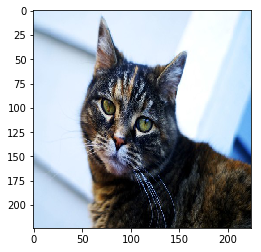

tabby 0.5647305


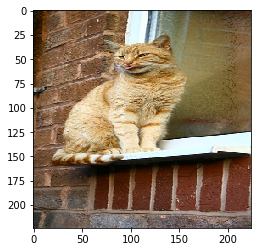

tiger_cat 0.3994993


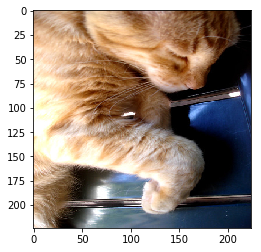

tiger_cat 0.18942444


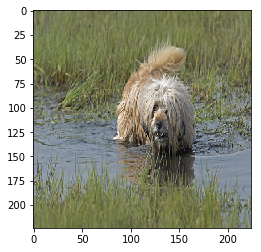

Tibetan_terrier 0.8124841


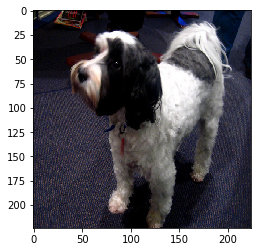

Tibetan_terrier 0.86200523


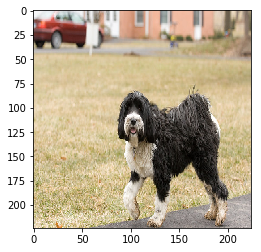

standard_poodle 0.23316099


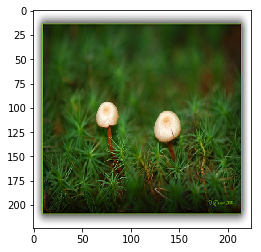

acorn 0.33854523


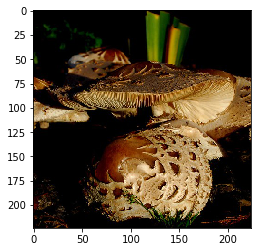

mushroom 0.7135982


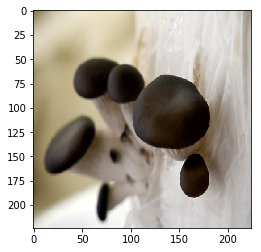

birdhouse 0.23660122


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt


def build_datas(file_names):

  datas = np.ndarray(shape=(len(file_names),224,224,3), dtype=float)
  
  i = 0
  for file_name in file_names:
    image = load_img(file_name, target_size=(224,224))
    image = img_to_array(image)
    image = vgg16.preprocess_input(image)  
    datas[i] = image
    i += 1
    
  return datas    

def batch_predict(model, datas):
  
  y_ = model.predict(datas)
  labels = np.array(vgg16.decode_predictions(y_))
  predicted = labels[:,0]
  
  return predicted
  
  
def show_image(file_name):
  image = load_img(file_name, target_size=(224,224))
  plt.imshow(image)
  plt.show()  

def batch_predict_with_vgg16(model, file_names):
  
  datas = build_datas(file_names)  
  print(datas.shape)
  
  predicteds = batch_predict(model, datas)
  print(predicteds)
  
  for i in range(len(file_names)):
    show_image(file_names[i])
    print(predicteds[i][1], predicteds[i][2])
  

  
model = vgg16.VGG16()

file_names = [
    "imagenet/cat1.jpg",
    "imagenet/cat2.jpg",
    "imagenet/cat3.jpg",
    "imagenet/dog1.jpg",
    "imagenet/dog2.jpg",
    "imagenet/dog3.jpg",
    "imagenet/mushroom1.jpg",
    "imagenet/mushroom2.jpg",
    "imagenet/mushroom3.jpg"    
]
   
batch_predict_with_vgg16(model, file_names)
 


# Quiz

구글링해서 찾은 임의의 쇼파 이미지를 VGG에 적용해서 분류 결과를 본다.

In [0]:
!wget -O sofa.jpg http://wx4.sinaimg.cn/mw690/006boOKDgy1fjggzqwijlj30j60j640w.jpg

--2019-07-24 06:12:07--  http://wx4.sinaimg.cn/mw690/006boOKDgy1fjggzqwijlj30j60j640w.jpg
Resolving wx4.sinaimg.cn (wx4.sinaimg.cn)... 104.93.0.156, 2600:1417:76:48e::102d, 2600:1417:76:483::102d
Connecting to wx4.sinaimg.cn (wx4.sinaimg.cn)|104.93.0.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134388 (131K) [image/jpeg]
Saving to: ‘sofa.jpg’

sofa.jpg            100%[===================>] 131.24K  --.-KB/s    in 0.008s  

2019-07-24 06:12:07 (15.4 MB/s) - ‘sofa.jpg’ saved [134388/134388]



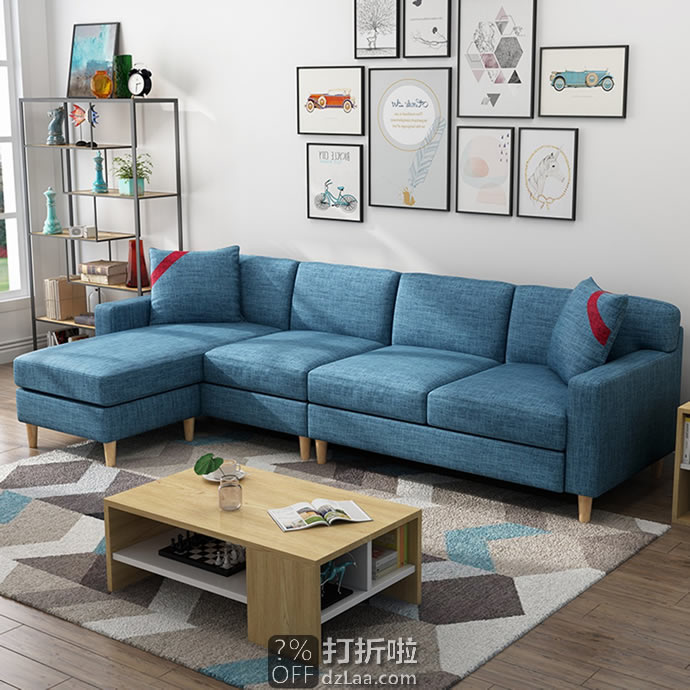

In [0]:
from IPython.display import Image
Image('sofa.jpg')

sofa.jpg


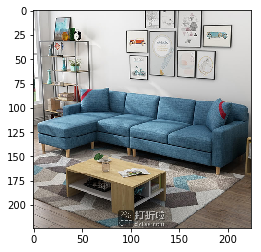

studio_couch 0.7929743


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

file_name = "sofa.jpg"

print(file_name)
image = load_img(file_name, target_size=(224,224))
plt.imshow(image)
plt.show()

image = img_to_array(image).reshape((1,224,224,3))
image = vgg16.preprocess_input(image)

model = vgg16.VGG16()
y_ = model.predict(image)
label = vgg16.decode_predictions(y_)
predicted = label[0][0]

print(predicted[1], predicted[2])

  


  


# ResNet50으로 분류

sofa.jpg


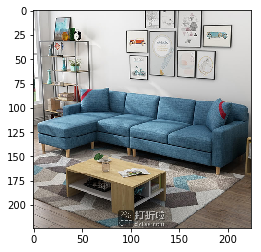

W0724 06:31:46.487966 140113077180288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



102858752/102853048 [==============================] - 7s 0us/step
studio_couch 0.9919629


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# from keras.applications import vgg16
from keras.applications import resnet50
import numpy as np
import matplotlib.pyplot as plt

file_name = "sofa.jpg"

print(file_name)
image = load_img(file_name, target_size=(224,224))
plt.imshow(image)
plt.show()

image = img_to_array(image).reshape((1,224,224,3))
# image = vgg16.preprocess_input(image)
image = resnet50.preprocess_input(image)

# model = vgg16.VGG16()
model = resnet50.ResNet50()
y_ = model.predict(image)
# label = vgg16.decode_predictions(y_)
label = resnet50.decode_predictions(y_)
predicted = label[0][0]

print(predicted[1], predicted[2])

# VGG16에 커스텀 데이터 학습

In [0]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
!ls -al

--2019-07-24 07:01:24--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz [following]
--2019-07-24 07:01:24--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz      

In [0]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

In [0]:
import os
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir("dogs")
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    data[i] = img_to_array(image)
  return data


def load_dogs_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names("dogs")
  x = load_image_files_into_numpy_array(file_names)

  x = x/255
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

Using TensorFlow backend.


In [0]:
(train_x, train_y), (test_x, test_y), custom_labels = load_dogs_data("dogs")

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)

(1535, 224, 224, 3)
(1535,)
(384, 224, 224, 3)
(384,)
['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound']


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import vgg16
import keras.backend as K

In [0]:
conv_layers = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.summary()
conv_layers.trainable = False

model = Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

# model.summary()

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.fit(train_x, train_y, epochs=10)







Epoch 1/10
1535/1535 [==============================] - 9s 6ms/step - loss: 2.2556 - acc: 0.1713
Epoch 2/10
1535/1535 [==============================] - 8s 5ms/step - loss: 1.8706 - acc: 0.2853
Epoch 3/10
1535/1535 [==============================] - 8s 5ms/step - loss: 1.7626 - acc: 0.3531
Epoch 4/10
1535/1535 [==============================] - 8s 5ms/step - loss: 1.6318 - acc: 0.3987
Epoch 5/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.5007 - acc: 0.4450
Epoch 6/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.4295 - acc: 0.4691
Epoch 7/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.3158 - acc: 0.5016
Epoch 8/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.2791 - acc: 0.5094
Epoch 9/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.2573 - acc: 0.5492
Epoch 10/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.1250 - acc: 0.5948


In [0]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.1216 - acc: 0.5824
Epoch 2/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.0452 - acc: 0.6137
Epoch 3/10
1535/1535 [==============================] - 9s 6ms/step - loss: 1.0083 - acc: 0.6469
Epoch 4/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.9199 - acc: 0.6645
Epoch 5/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.9998 - acc: 0.6378
Epoch 6/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.7975 - acc: 0.7055
Epoch 7/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.9039 - acc: 0.6879
Epoch 8/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.7342 - acc: 0.7199
Epoch 9/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.7839 - acc: 0.7362
Epoch 10/10
1535/1535 [==============================] - 9s 6ms/step - loss: 0.6684 - acc: 0.7713


In [0]:
loss, acc = model.evaluate(test_x, test_y)
print(loss, acc)


384/384 [==============================] - 2s 6ms/step
8.543168296416601 0.057291666666666664


In [0]:
y_ = model.predict(test_x)
print(y_.shape)

predicted = np.argmax(y_, axis=1)
# print(predicted)

print(custom_labels[predicted[0]])


(384, 10)
n02088094-Afghan_hound


# VGG16 데이터 증강

In [6]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
!ls -al  

--2019-07-25 01:25:20--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz [following]
--2019-07-25 01:25:20--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         1

In [7]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

In [0]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import vgg16

import matplotlib.pyplot as plt
import numpy as np

import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


from keras.applications import VGG16
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)
# ADD END

# model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
    data_aug_generator.flow(train_x, train_y, batch_size=64),
    steps_per_epoch=train_x.shape[0]/64,
    epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])




Epoch 1/10
24/23 [==============================] - 18s 760ms/step - loss: 12.5875 - acc: 0.2137
Epoch 2/10
24/23 [==============================] - 17s 704ms/step - loss: 11.7282 - acc: 0.2710
Epoch 3/10
24/23 [==============================] - 17s 698ms/step - loss: 10.4484 - acc: 0.3492
Epoch 4/10
24/23 [==============================] - 17s 709ms/step - loss: 10.7846 - acc: 0.3290
Epoch 5/10
24/23 [==============================] - 17s 704ms/step - loss: 9.6264 - acc: 0.4007
Epoch 6/10
24/23 [==============================] - 17s 717ms/step - loss: 9.7461 - acc: 0.3941
Epoch 7/10
24/23 [==============================] - 16s 684ms/step - loss: 10.3107 - acc: 0.3603
Epoch 8/10
24/23 [==============================] - 17s 709ms/step - loss: 9.5827 - acc: 0.4046
Epoch 9/10
24/23 [==============================] - 16s 674ms/step - loss: 9.0891 - acc: 0.4338
Epoch 10/10
384/384 [==============================] - 7s 18ms/step
loss = 16.11809539794922
acc = 0.0
4 n02086240-Shih-Tzu


# 구조적인 데이터 사용

In [16]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2019-07-25 01:50:56--  https://github.com/dhrim/cup_deeplearning_seminar/raw/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz [following]
--2019-07-25 01:50:56--  https://raw.githubusercontent.com/dhrim/cup_deeplearning_seminar/master/%EA%B5%90%EC%9C%A1%EC%9E%90%EB%A3%8C/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_pre

In [17]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import vgg16

import matplotlib.pyplot as plt
import numpy as np


from keras.applications import VGG16
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


# y_ = model.predict(test_x)
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 29s 1s/step - loss: 14.2862 - acc: 0.1111 - val_loss: 14.0278 - val_acc: 0.1250
Epoch 2/10
24/23 [==============================] - 18s 768ms/step - loss: 14.2619 - acc: 0.1147 - val_loss: 14.2041 - val_acc: 0.1187
Epoch 3/10
24/23 [==============================] - 24s 984ms/step - loss: 14.5265 - acc: 0.0987 - val_loss: 15.2633 - val_acc: 0.0530
Epoch 4/10
24/23 [==============================] - 21s 886ms/step - loss: 14.5362 - acc: 0.0981 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
24/23 [==============================] - 23s 941ms/step - loss: 14.5404 - acc: 0.0979 - val_loss: 14.4055 - val_acc: 0.1062
Epoch 6/10
24/23 [==============================] - 22s 904ms/step - loss: 14.5379 - acc: 0.0980 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 7/10
24/23 [==============================] - 23s 939ms/step - loss: 14.5299 - acc: 0.0985 - val_loss:

# Quiz

ResNet50을 사용한 전이학습

데이터와 네트웤 구조는 바로 앞의것과 동일하다.

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
# from keras.applications import vgg16
from keras.applications import resnet50
# from keras.applications import VGG16
from keras.applications import ResNet50

import matplotlib.pyplot as plt
import numpy as np


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


W0725 02:45:35.473677 140618785335168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________

In [20]:
print(custom_labels)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound']


# Quiz

데이터 증강한 이미지를 출력

Found 1531 images belonging to 10 classes.
(64, 224, 224, 3)
(64,)


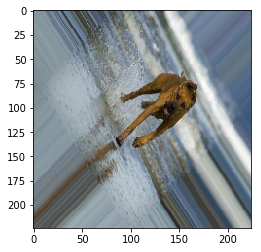

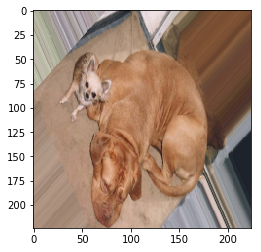

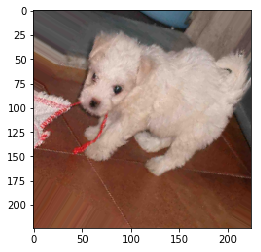

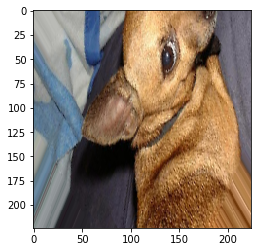

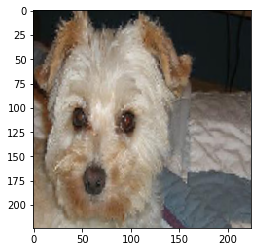

In [32]:
data_aug_generator = ImageDataGenerator(
      rotation_range=90,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      zoom_range=0.5
#       preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

for image in batch_x[:5]:
  plt.imshow(image.astype(int))
  plt.show()
